# `Logistic Regression ---------------------------------------- `

In [60]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [61]:
data  = pd.read_csv("Social_Network_Ads.csv")

In [62]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [63]:
data.drop(["User ID"],axis=1,inplace=True) ## unwanted column

In [64]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [65]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### Converting to category

In [66]:
conversion_col_cat = ["Gender","Purchased"]
for col in conversion_col_cat:
    data[col] = data[col].astype("category")

In [67]:
data.dtypes

Gender             category
Age                   int64
EstimatedSalary       int64
Purchased          category
dtype: object

In [68]:
target = "Purchased"
cont_columns = data.select_dtypes("int64")
cat_columns = [i for i in data.select_dtypes("category") if i!= target]

## `Bivariant analysis`

### Cat vs Num : T-test

Age => t-test result => Ttest_indResult(statistic=-15.86638147378889, pvalue=2.800233943272422e-44)

EstimatedSalary => t-test result => Ttest_indResult(statistic=-7.7493599219079, pvalue=7.772785450066969e-14)



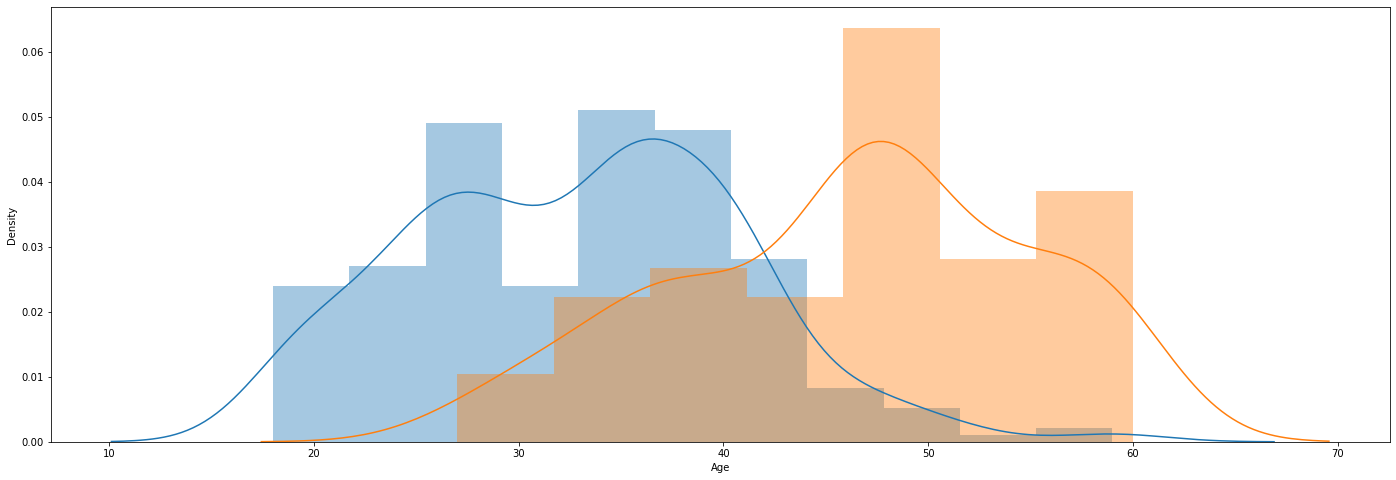

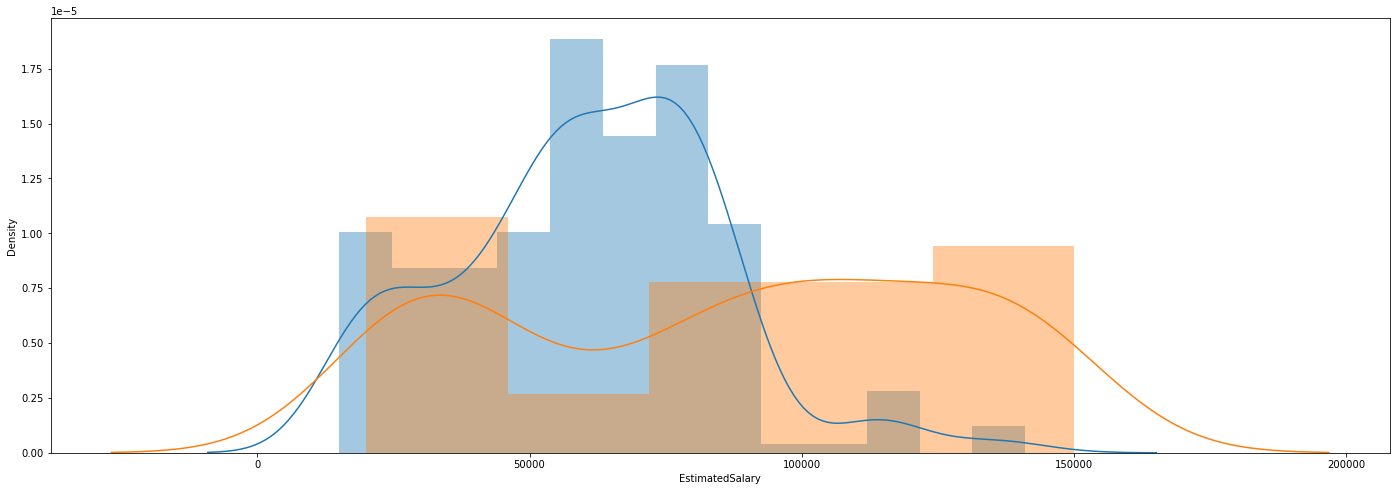

In [69]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

def t_test_plot(col,grp1,grp2):
    plt.figure(figsize=(24,8))
    sns.distplot(grp1)
    sns.distplot(grp2)
    t_test_resutl = ttest_ind(grp1,grp2)
    print(f"{col} => t-test result => {t_test_resutl}\n")

    
for col in cont_columns:
    grp1 = data.loc[data[target]==0,col]
    grp2 = data.loc[data[target]==1,col]
    t_test_plot(col,grp1,grp2)

### Cat vs Cat - chi square test

In [70]:
from scipy.stats import chi2_contingency

two_freq = pd.crosstab(data["Purchased"],data["Gender"])
chi2_contingency(two_freq)

(0.5550869364098915,
 0.45624659183130645,
 1,
 array([[131.07, 125.93],
        [ 72.93,  70.07]]))

In [71]:
data.drop(["Gender"],axis=1,inplace=True)

In [72]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


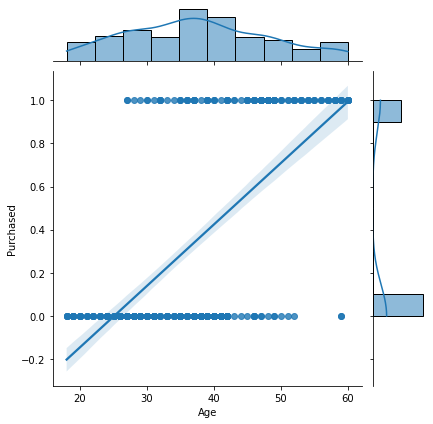

In [73]:
sns.jointplot(data["Age"],data["Purchased"].astype(int),kind='reg')

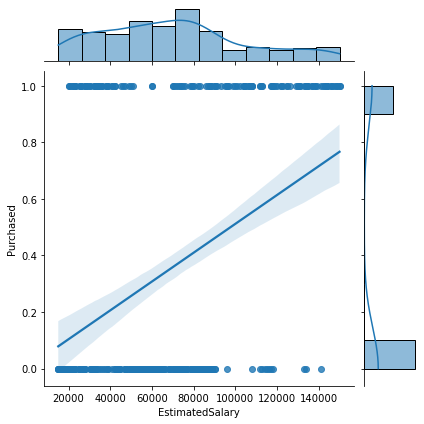

In [74]:
sns.jointplot(data["EstimatedSalary"],data["Purchased"].astype(int),kind='reg')

In [75]:
import plotly.express as px
px.scatter(y=data["EstimatedSalary"],x=data["Age"],color=data["Purchased"])

## `Modelling ----------------------------------`

In [76]:
X = data[["EstimatedSalary","Age"]]
y = data["Purchased"]

In [77]:
X

,EstimatedSalary,Age
0,19000,19
1,20000,35
2,43000,26
3,57000,27
4,76000,19
...,...,...
395,41000,46
396,23000,51
397,20000,50
398,33000,36


In [78]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: category
Categories (2, int64): [0, 1]

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [80]:
X_train

,EstimatedSalary,Age
3,57000,27
18,28000,46
202,134000,39
250,39000,44
274,26000,57
...,...,...
71,27000,24
106,35000,26
270,133000,43
348,77000,39


## `Gradient Descent Approach`

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [82]:
y_pred = model.predict(X_test)

In [83]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.65

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[52,  0],
       [28,  0]], dtype=int64)

## `Biased model, not able to identify 1`
## `elongated gradient descent curve because of high range values`
## `Needs to Standardization/z normalization to improve accuracy`
### `range: -3 to +3`

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [87]:
X_train

array([[-0.38634438, -1.06675246],
       [-1.22993871,  0.79753468],
       [ 1.853544  ,  0.11069205],
       [-0.90995465,  0.60129393],
       [-1.28811763,  1.87685881],
       [ 1.44629156, -0.57615058],
       [-0.53179168,  0.3069328 ],
       [ 0.10817643,  0.99377543],
       [ 0.45724994, -1.16487283],
       [ 0.31180264, -1.55735433],
       [ 0.45724994,  1.0918958 ],
       [-0.47361276, -0.18366908],
       [-0.32816546,  0.20881242],
       [ 0.28271318,  0.3069328 ],
       [-1.57901222, -1.16487283],
       [ 0.25362372,  0.11069205],
       [ 1.73718616,  2.07309956],
       [-0.18271817,  0.40505317],
       [ 2.11534913,  1.4843773 ],
       [ 1.21357589, -0.37990983],
       [ 1.50447048,  1.87685881],
       [ 0.02090805,  0.11069205],
       [-1.31720709,  0.89565505],
       [-1.49174384, -1.36111358],
       [-0.5899706 , -0.18366908],
       [ 2.31897535, -0.57615058],
       [-1.20084925,  0.99377543],
       [ 1.06812859, -0.77239133],
       [-1.05540195,

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [89]:
y_pred = model.predict(X_test)

In [90]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [91]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: category
Categories (2, int64): [0, 1]

## `Evaluation Metrics`

In [92]:
from sklearn.metrics import accuracy_score
import numpy as np
np.round(accuracy_score(y_test,y_pred),3)

0.862

In [93]:
error = 1 - (accuracy_score(y_test,y_pred))
np.round(error,3)

0.137

### `how precisely my algo work => TP/(TP+FP)`

In [94]:
from sklearn.metrics import precision_score
np.round(precision_score(y_test,y_pred),3)

0.905

### `how much my algo can identify correctly => TP/(TP+FN)`

In [115]:
from sklearn.metrics import recall_score
np.round(recall_score(y_test,y_pred),3)

0.679

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 9, 19]], dtype=int64)

### `uses both precision and recall, visualize both in single`

In [116]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7916666666666667



![](https://www.kdnuggets.com/wp-content/uploads/nagesh-metrics-1.png)
### `Formulae list`:
<br />

![](https://www.researchgate.net/publication/325567208/figure/tbl4/AS:668664739151911@1536433505975/Classification-performance-metrics-based-on-the-confusion-matrix.png)

# `Finding Threshold to increase Accurcy`

## 1. `Manual Thresholding/Increase Algo performance`

<AxesSubplot:xlabel='Purchased', ylabel='count'>

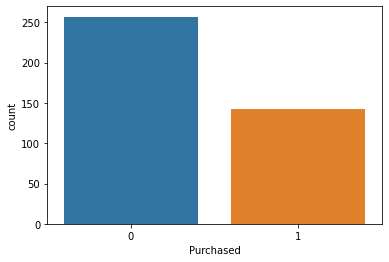

In [97]:
sns.countplot(data.Purchased)

In [98]:
data.Purchased.value_counts()/data.shape[0]

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [99]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.73534871, 0.26465129],
       [0.02498735, 0.97501265],
       [0.97738829, 0.02261171],
       [0.14098586, 0.85901414],
       [0.98372781, 0.01627219],
       [0.94193753, 0.05806247],
       [0.12158492, 0.87841508],
       [0.90769831, 0.09230169],
       [0.60560973, 0.39439027],
       [0.59228718, 0.40771282],
       [0.84854358, 0.15145642],
       [0.32649286, 0.67350714],
       [0.99003321, 0.00996679],
       [0.99753338, 0.00246662],
       [0.87663529, 0.12336471],
       [0.57527564, 0.42472436],
       [0.33999008, 0.66000992],
       [0.33290988, 0.66709012],
       [0.84701102, 0.15298898],
       [0.10330161, 0.89669839],
       [0.99586739, 0.00413261],
       [0.91566908, 0.08433092],
       [0.68913639, 0.31086361],
       [0.03669063, 0.96330937],
       [0.99821641, 0.00178359],
       [0.50619308, 0.49380692],
       [0.46957374, 0.53042626],
       [0.84989721, 0.15010279],
       [0.01607206, 0.98392794],
       [0.99809488, 0.00190512],
       [0.

In [100]:
import numpy as np
y_pred = np.where(y_pred_proba[:,1]<0.65,0,1) # manual threshold

In [101]:
from sklearn.metrics import accuracy_score
import numpy as np
np.round(accuracy_score(y_test,y_pred),3)

0.862

# 2. `ROC AUC` to find threshold
- Receiver Operating Curve
- Area Under the curve

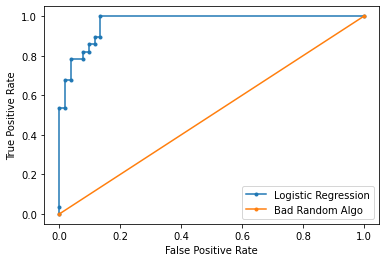

AUC is => 0.9684065934065934


In [103]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt


ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test.astype(int),ns_prob)

lr_prob = y_pred_proba[:,1]
lr_auc = roc_auc_score(y_test.astype(int),lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds = roc_curve(y_test.astype(int),lr_prob)

# plotting
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


print(f'AUC is => {lr_auc}')

### `Check for different bents`

In [111]:
y_pred = np.where(y_pred_proba[:,1]<.70,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')
confusion_matrix(y_test,y_pred)

Accuracy => 0.825


array([[52,  0],
       [14, 14]], dtype=int64)

In [112]:
y_pred = np.where(y_pred_proba[:,1]<.80,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')
confusion_matrix(y_test,y_pred)

Accuracy => 0.8125


array([[52,  0],
       [15, 13]], dtype=int64)

In [113]:
y_pred = np.where(y_pred_proba[:,1]<.60,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')
confusion_matrix(y_test,y_pred)

Accuracy => 0.875


array([[51,  1],
       [ 9, 19]], dtype=int64)

In [114]:
y_pred = np.where(y_pred_proba[:,1]<.55,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')
confusion_matrix(y_test,y_pred)

Accuracy => 0.875


array([[51,  1],
       [ 9, 19]], dtype=int64)

![](https://paulvanderlaken.files.wordpress.com/2019/08/roc.gif)

## 3. `Finding threshold using LogLoss[Don't use this method], only for reference (not purely MLE)`
### [Logistic Regression Details Pt 2: Maximum Likelihood](https://www.youtube.com/watch?v=BfKanl1aSG0&ab_channel=StatQuestwithJoshStarmer)